In [18]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [19]:
from pathlib import Path

import pandas as pd

data = pd.read_csv("calibrate.csv", header=0)

data.head()

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
0,0.006392,-0.057524,-0.049002,9.804256,-0.044293,-0.414197
1,0.007457,-0.058590,-0.050067,9.813833,-0.045490,-0.428562
2,0.006392,-0.058590,-0.049002,9.806650,-0.045490,-0.470461
3,0.007457,-0.052198,-0.047937,9.800665,-0.050278,-0.392649
4,0.010653,-0.058590,-0.047937,9.816227,-0.047884,-0.379481


In [20]:
# from imucal import ferraris_regions_from_interactive_plot

# regions, section_list = ferraris_regions_from_interactive_plot(data)
# section_list.to_json("section_list.json")

In [21]:
from imucal import ferraris_regions_from_section_list

section_list = pd.read_json("section_list.json")

section_list

,start,end
x_p,138,956
x_a,1694,2444
y_p,3463,4187
y_a,4965,5702
z_p,7003,7633
z_a,8437,9483
x_rot,10381,11964
y_rot,13009,15315
z_rot,16294,18345


In [22]:
regions = ferraris_regions_from_section_list(data, section_list)
regions

FerrarisSignalRegions(acc_x_p=array([[ 9.805453  , -0.04668693, -0.2741361 ],
       [ 9.81503   , -0.04429273, -0.2825158 ],
       [ 9.811439  , -0.04548983, -0.29209262],
       ...,
       [ 9.811439  , -0.04429273, -0.23104046],
       [ 9.81503   , -0.04429273, -0.23343466],
       [ 9.813833  , -0.04429273, -0.22625206]]), acc_x_a=array([[-9.776723  , -0.09696517,  0.02154782],
       [-9.773131  , -0.11372458,  0.02394202],
       [-9.768343  , -0.11133038,  0.02753332],
       ...,
       [-9.776723  , -0.12330139,  0.02873042],
       [-9.78989   , -0.11611878,  0.03471592],
       [-9.779117  , -0.09696517,  0.03351883]]), acc_y_p=array([[-0.12569559,  9.67856   , -0.08858547],
       [-0.11851298,  9.6845455 , -0.09576806],
       [-0.11013328,  9.701305  , -0.08738836],
       ...,
       [-0.10893618,  9.67018   , -0.07661445],
       [-0.11372458,  9.674969  , -0.07062895],
       [-0.10654198,  9.672575  , -0.09337387]]), acc_y_a=array([[-0.09816227, -9.849746  , -0.092

In [23]:
from imucal import FerrarisCalibration

cal = FerrarisCalibration()
cal_info = cal.compute(
    regions, sampling_rate_hz=100, from_acc_unit="m/s^2", from_gyr_unit="rad/s", comment="FRA333_lab3"
)

In [24]:
folder = "info"
cal_info.to_json_file("arduino_imu.json")

In [25]:
from imucal.management import save_calibration_info
from datetime import datetime

file_path = save_calibration_info(
    cal_info, sensor_id="arduinoimu", cal_time=datetime(2022, 11, 23, 0, 0), folder=Path(folder)
)
file_path

PosixPath('info/arduinoimu/Ferraris/arduinoimu_2022-11-23_00-00.json')

In [26]:
from imucal.management import find_calibration_info_for_sensor

cals = find_calibration_info_for_sensor("arduinoimu", Path(folder))
cals

[PosixPath('info/arduinoimu/Ferraris/arduinoimu_2022-11-23_00-00.json')]

In [27]:
from imucal.management import load_calibration_info

loaded_cal_info = load_calibration_info(cals[0])
print(loaded_cal_info.to_json())

{
    "acc_unit": "m/s^2",
    "gyr_unit": "deg/s",
    "from_acc_unit": "m/s^2",
    "from_gyr_unit": "rad/s",
    "comment": "FRA333_lab3",
    "K_a": [
        [
            0.9987285344249883,
            0.0,
            0.0
        ],
        [
            0.0,
            0.9954758877951708,
            0.0
        ],
        [
            0.0,
            0.0,
            0.9979662876348324
        ]
    ],
    "R_a": [
        [
            0.9999550335502001,
            -0.0007415758136796565,
            -0.00945414950861233
        ],
        [
            0.003152812376228884,
            0.9999476260508968,
            0.009736782286572529
        ],
        [
            -0.01400893992741739,
            0.00038284232215523336,
            0.9999017966949885
        ]
    ],
    "b_a": [
        0.016054246706601383,
        -0.08447980120570442,
        -0.030998255390906948
    ],
    "K_g": [
        [
            0.015430230222427442,
            0.0,
            0.

In [28]:
calibrated_data = loaded_cal_info.calibrate_df(data, "m/s^2", "rad/s")

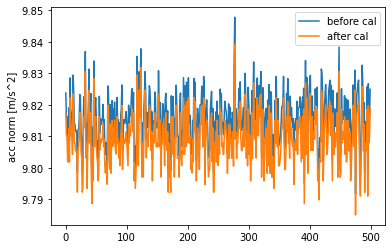

In [29]:
import matplotlib.pyplot as plt
from numpy.linalg import norm

plt.figure()
plt.plot(norm(data.filter(like="acc"), axis=1)[500:1000], label="before cal")
plt.plot(norm(calibrated_data.filter(like="acc")[500:1000], axis=1), label="after cal")
plt.legend()
plt.ylabel("acc norm [m/s^2]")
plt.show()